<center> <h1> <b>InLab</b></h1> </center><br>
<b>Company Introduction</b><br>
Your client for this project is a pharmaceutical company.

They have a long history of making effective drugs and are the leading producer of antibiotics for bacterial infection.
Their research and development team have recently developed five types of drugs to fight against chronic throat infection.
They want to quickly release the drug in the market so that they could cure people and increase revenue for the company.
Their R&D team made a brief analysis of the chemical composition present in the drug and made a brief report stating that each drug has a different effect according to their health.
The drug which has a higher concentration of chemicals should be given to those groups of people whose health report passes some criteria as suggested by the R&D team.

Current Scenario
The R&D group has invited some groups of people to test the drug, but going through each person’s health report might take a lot of time and cause a delay in launching the drug in the market.

<b><h1>Problem Statement: </h1></b>
The current process suffers from the following problems:

Testing phase takes a lot of time and it's done manually because they need to carefully examine each person for the side effects.
Most of the crucial time is being wasted in checking each person’s health report and dispensing specific drugs according to the health metric as suggested by the R&D team.
This process is time-consuming and wastage of resources.

The company has hired you as data science consultants. They want to automate the process of assigning the drug according to their health report.

# Dataset Description 

<table>	<th>	Column Name	</th>	<th>	Description	</th>	
<tr>	<td>	Id	</td>	<td>	Unique Id of the sample	</td>	</tr>
<tr>	<td>	Age	</td>	<td>	Age of the person	</td>	</tr>
<tr>	<td>	Sex	</td>	<td>	The sex of the person(M and F)	</td>	</tr>
<tr>	<td>	BP	</td>	<td>	Blood pressure of the person	</td>	</tr>
<tr>	<td>	Cholesterol	</td>	<td>	The level of cholesterol in a person's body	</td>	</tr>
<tr>	<td>	Na_to_K	</td>	<td>	Sodium and potassium ratio	</td>	</tr>
<tr>	<td>	Drug	</td>	<td>	Contains 5 classes of drugs encoded as(drug A : 2, drug B : 4, drug C : 2, drug X : 0, drug Y : 1)	</td>	</tr>
</table>

### Importing Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from pandas_profiling import profile_report

In [116]:
# Metrics & Models
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectFromModel

In [4]:
# Data Importing

In [5]:
train_data = pd.read_csv('drug_train.csv')
print(train_data.shape)
train_data.head()

(160, 7)


,Id,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,79,32,F,LOW,NORMAL,10.840,drugX
1,197,52,M,NORMAL,HIGH,9.894,drugX
2,38,39,F,NORMAL,NORMAL,9.709,drugX
3,24,33,F,LOW,HIGH,33.486,DrugY
4,122,34,M,NORMAL,HIGH,22.456,DrugY


In [6]:
test_data = pd.read_csv('drug_test.csv')
print(test_data.shape)
test_data.head()

(40, 6)


,Id,Age,Sex,BP,Cholesterol,Na_to_K
0,95,36,M,LOW,NORMAL,11.424
1,15,16,F,HIGH,NORMAL,15.516
2,30,18,F,NORMAL,NORMAL,8.750
3,158,59,F,LOW,HIGH,10.444
4,128,47,M,LOW,NORMAL,33.542


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           160 non-null    int64  
 1   Age          160 non-null    int64  
 2   Sex          160 non-null    object 
 3   BP           160 non-null    object 
 4   Cholesterol  160 non-null    object 
 5   Na_to_K      160 non-null    float64
 6   Drug         160 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.9+ KB


In [8]:
train_data.describe()

,Id,Age,Na_to_K
count,160.000000,160.000000,160.000000
mean,99.075000,45.387500,16.194988
std,59.374894,16.101481,7.254689
min,0.000000,15.000000,6.269000
25%,45.500000,32.000000,10.445250
50%,100.500000,46.000000,14.076500
75%,149.500000,58.250000,19.480750
max,199.000000,74.000000,38.247000


In [9]:
PR = train_data.profile_report(title="PR")
#PR.to_file('Profile_Report.html')

### Dataset Description

No of Variable :  7<br>
No of Observations : 160<br>
No Missing Values:0<br>
No of Duplicate Values :0<br>

<b>Columns Descriptions: </b>

- 1 -ID - Distinct Values <br>
- 2 - Age - Almost Normally Distributed. Mean -45, Min -15, Max- 74
- 3 - Sex -  M(83), F(77)
- 4 - BP - H - 62 , N - 51 , L -47
- 5 - Cholesterol - H - 88, N-72
- 6 - NA_to_K - Mean -16.6 , Min - 6.26, Max - 38.24
- 7 - Target Variable -  Drug A, B ,C, X, Y = 17,13,11,43,76


In [10]:
#Encoding the Drugs - drug A : 2, drug B : 4, drug C : 2, drug X : 0, drug Y : 1)
Map = {'drugA' : 2, 'drugB' : 4, 'drugC' : 3, 'drugX' : 0, 'DrugY' : 1}


In [11]:
train_data['Drug']=train_data['Drug'].map(Map)

In [12]:
train_data['Drug'].value_counts()

1    76
0    43
2    17
4    13
3    11
Name: Drug, dtype: int64

# Exploratory Data Analysis

In [13]:
train_data.columns

Index(['Id', 'Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

### Q1 -  What is the distribution of the Categorical Variables 

<AxesSubplot:xlabel='Drug', ylabel='count'>

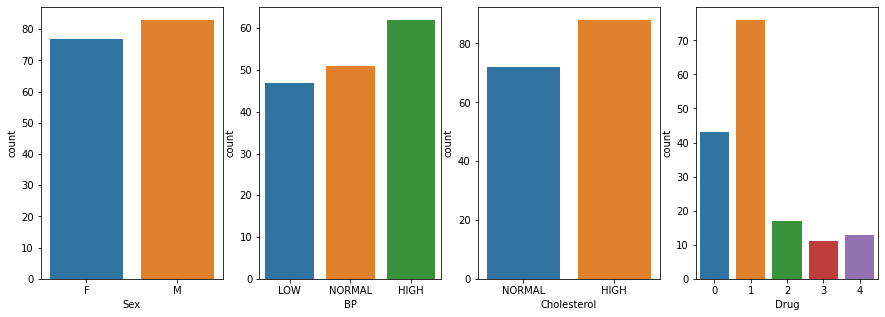

In [14]:
f,axes = plt.subplots(1,4,figsize=(15,5))
sns.countplot(train_data['Sex'],ax=axes[0])
sns.countplot(train_data['BP'],ax=axes[1])
sns.countplot(train_data['Cholesterol'],ax=axes[2])
sns.countplot(train_data['Drug'],ax=axes[3])

### Insights -  1) Male and Female are almost equally Split<br>   2) Most number of patients are having High BP <br> 3) Cholesterol has highes split in the dataset <br> 4) Drug 1 has highest distribution in the dataset followed by 0

### Q2 -  What is the relationship of Categorical Variables with Target Variable

<AxesSubplot:xlabel='Cholesterol', ylabel='count'>

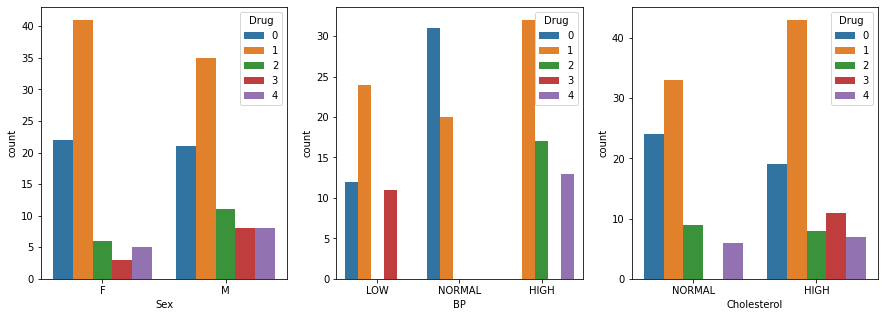

In [15]:
f,axes = plt.subplots(1,3,figsize=(15,5))
sns.countplot(train_data['Sex'],ax=axes[0],hue=train_data['Drug'])
sns.countplot(train_data['BP'],ax=axes[1],hue=train_data['Drug'])
sns.countplot(train_data['Cholesterol'],ax=axes[2],hue=train_data['Drug'])


### Insights - 1) Distribution of Drug 1 is given to Female Segments <br> 2) i) Patients with Low BP is not given Drug 2 and 4 ii)Patients with Normal BP is given only Drug 0 and 1 iii) Patients with High BP is given Drug 1,2 &4<br> 3) Patients with Normal Cholestrol is not given Drug 3


### Q3 - What is the Distribution of Age with Respect to Drug given to Patient

<AxesSubplot:xlabel='Drug', ylabel='Age'>

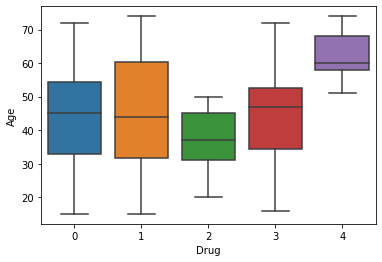

In [17]:
sns.boxplot(data=train_data, x='Drug', y='Age')

###  Insights - Drug 0,1 & 3 is normally distributed and given to all the age Group. Drug 2 is given to Age group of 20 to 50. Drug 4 is given to 51 and above group

### Q4 - What is the Distribution of Na_to_K with Respect to Drug given to Patient

<AxesSubplot:xlabel='Drug', ylabel='Na_to_K'>

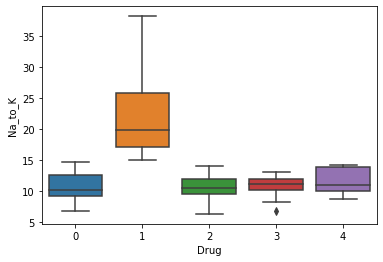

In [19]:
sns.boxplot(data=train_data, x='Drug', y='Na_to_K')

### Insights - Drug 1 is given only to the patients with Na_to_K greater than 15

In [21]:
catcols = set(train_data.columns) - set(train_data.describe().columns)

### Converting Categorical Variable into Numerical Variable

In [23]:
train_data = pd.get_dummies(train_data,drop_first=True)

In [24]:
train_data.columns

Index(['Id', 'Age', 'Na_to_K', 'Drug', 'Sex_M', 'BP_LOW', 'BP_NORMAL',
       'Cholesterol_NORMAL'],
      dtype='object')

In [26]:
train_data.corr()['Drug']

Id                    0.012837
Age                   0.190332
Na_to_K              -0.118431
Drug                  1.000000
Sex_M                 0.128299
BP_LOW               -0.003342
BP_NORMAL            -0.489648
Cholesterol_NORMAL   -0.138715
Name: Drug, dtype: float64

In [29]:
X = train_data.drop(['Id','Drug'],axis=1)
y = train_data['Drug']
print(X.shape,y.shape)
X.head()
y.head()

(160, 6) (160,)


0    0
1    0
2    0
3    1
4    1
Name: Drug, dtype: int64

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [38]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(128, 6) (32, 6) (128,) (32,)


In [39]:
# Scaling the Variables
SS = StandardScaler()
X_train[X_train.columns] = SS.fit_transform(X_train)
X_test[X_test.columns] = SS.fit_transform(X_test)
X_test.head()

## 1 - Trying first with Logistic Regression

In [50]:
LR = LogisticRegression()
LR.fit(X_train,y_train)
LR_PredValues_train = LR.predict(X_train)
LR_PredValues_test = LR.predict(X_test)

### Checking ModelPerformance

In [117]:
Acc_train = print( accuracy_score(LR_PredValues_train,y_train))
Acc_test = print( accuracy_score(LR_PredValues_test,y_test))
conf_train = print( classification_report(LR_PredValues_train,y_train))
conf_test = print( classification_report(LR_PredValues_test,y_test))

0.984375
0.875
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.98      0.98      0.98        62
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00         8
           4       0.91      0.91      0.91        11

    accuracy                           0.98       128
   macro avg       0.98      0.98      0.98       128
weighted avg       0.98      0.98      0.98       128

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         9
           1       1.00      0.82      0.90        17
           2       0.00      0.00      0.00         0
           3       1.00      1.00      1.00         3
           4       1.00      0.67      0.80         3

    accuracy                           0.88        32
   macro avg       0.75      0.70      0.71        32
weighted avg       0.93      0.88      0.89        32



## 2 - Decision Tree Classifier

In [58]:
DT = DecisionTreeClassifier(random_state=42,class_weight='balanced')
DT.fit(X_train,y_train)
DT_PredValues_train = DT.predict(X_train)
DT_PredValues_test = DT.predict(X_test)

In [118]:
DT_train = print( accuracy_score(DT_PredValues_train,y_train))
DT_test = print( accuracy_score(DT_PredValues_test,y_test))
conf_train = print( classification_report(DT_PredValues_train,y_train))
conf_test = print( classification_report(DT_PredValues_test,y_test))

1.0
0.96875
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        62
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00        11

    accuracy                           1.00       128
   macro avg       1.00      1.00      1.00       128
weighted avg       1.00      1.00      1.00       128

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       0.00      0.00      0.00         0
           3       1.00      1.00      1.00         3
           4       1.00      0.67      0.80         3

    accuracy                           0.97        32
   macro avg       0.80      0.73      0.76        32
weighted avg       1.00      0.97      0.98        32



## 3 - RandomForestClassifier

In [69]:
RFC = DecisionTreeClassifier(random_state=42,class_weight='balanced')
RFC.fit(X_train,y_train)
RFC_PredValues_train = RFC.predict(X_train)
RFC_PredValues_test = RFC.predict(X_test)

In [119]:
RFC_train = print( accuracy_score(RFC_PredValues_train,y_train))
RFC_test = print( accuracy_score(RFC_PredValues_test,y_test))
class_train = print( classification_report(RFC_PredValues_train,y_train))
class_test = print( classification_report(RFC_PredValues_test,y_test))


1.0
0.96875
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        62
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00        11

    accuracy                           1.00       128
   macro avg       1.00      1.00      1.00       128
weighted avg       1.00      1.00      1.00       128

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       0.00      0.00      0.00         0
           3       1.00      1.00      1.00         3
           4       1.00      0.67      0.80         3

    accuracy                           0.97        32
   macro avg       0.80      0.73      0.76        32
weighted avg       1.00      0.97      0.98        32



## 4 - Naive Bayes - Gaussian

In [72]:
NB = GaussianNB()
NB.fit(X_train,y_train)
NB_PredValues_train = NB.predict(X_train)
NB_PredValues_test = NB.predict(X_test)

In [73]:
NB_train = print( accuracy_score(NB_PredValues_train,y_train))
NB_test = print( accuracy_score(NB_PredValues_test,y_test))

0.7734375
0.75


## Basis checking all the Parameters - Random Forest we will choose for Predicting the Test_Data

In [98]:
test_data = pd.get_dummies(test_data,drop_first=True)

In [99]:
test_data.columns

Index(['Id', 'Age', 'Na_to_K', 'Sex_M', 'BP_LOW', 'BP_NORMAL',
       'Cholesterol_NORMAL'],
      dtype='object')

In [102]:
X1 = test_data.drop(['Id'],axis=1)
print(X1.shape)
X.head()


(40, 6)


,Age,Na_to_K,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
0,32,10.840,0,1,0,1
1,52,9.894,1,0,1,0
2,39,9.709,0,0,1,1
3,33,33.486,0,1,0,0
4,34,22.456,1,0,1,0


In [103]:
X1[X1.columns] = SS.transform(X1)

In [105]:
FinalPredValues = RFC.predict(X1)

In [107]:
FinalPredValues

array([0, 1, 0, 3, 1, 1, 1, 0, 2, 0, 2, 0, 1, 2, 4, 1, 4, 0, 3, 1, 4, 0,
       0, 1, 1, 1, 3, 0, 1, 0, 1, 3, 3, 1, 4, 1, 0, 2, 1, 2], dtype=int64)

In [108]:
Op = pd.DataFrame(test_data['Id'])

In [110]:
Op['Predval'] = FinalPredValues

In [120]:
Op.to_csv('submission.csv', index=False,header=False)